In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [52]:
X,y = fetch_california_housing(as_frame=True, return_X_y=True)


In [53]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


now finding number of missing values in the dataset

In [54]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

so there are no missing values in the dataset that's why imputation is not required

now printing first five rows of the dataset

In [55]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

so the output variable is the price of the house which is a continuous numerical values so it is a regression task

## EDA

first i am finding in the dataset how many features are numerical and how many are cateegorical

In [57]:
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [58]:
print(len(numerical_features))
print((categorical_features))

8
[]


all of the 8 columns are numeric columns

first of all i am creating a correlation matrix to find the correlation between all the columns

In [59]:
X['Price'] = y
numerical_features.append('Price')

In [60]:
correlation_mat = X.corr()

In [ ]:
print(correlation_mat)

In [ ]:
X.describe()

In [ ]:
sns.boxplot(X['MedInc'])

In [65]:
q3 = X['MedInc'].quantile(0.75)
q1 = X['MedInc'].quantile(0.25)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print(len(X[(X['MedInc'] > upper_limit) | (X['MedInc'] < lower_limit)]))

34


so MedInc has 681 outliers and i am removing the outliers

In [64]:
X = X[(X['MedInc'] > lower_limit) & (X['MedInc'] < upper_limit)]

In [66]:
X.shape

(19795, 9)

now doing the same thing for all the features

In [ ]:
print(numerical_features[1:])

In [68]:
for feature in numerical_features[1:]:
    q3 = X[feature].quantile(0.75)
    q1 = X[feature].quantile(0.25)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print(f'{feature} has : ', len(X[(X[feature] > upper_limit) | (X[feature] < lower_limit)]), 'outliers')
    X = X[(X[feature] > lower_limit) & (X[feature] < upper_limit)]

HouseAge has :  0 outliers
AveRooms has :  70 outliers
AveBedrms has :  124 outliers
Population has :  315 outliers
AveOccup has :  119 outliers
Latitude has :  0 outliers
Longitude has :  0 outliers
Price has :  123 outliers


In [69]:
X.shape

(15377, 9)

now i have removed all the outliers

In [ ]:
sns.pairplot(X)

In [ ]:
correlation_mat = X.corr()

print(correlation_mat)

## Model Training 

first spliting the data into training and testing data

In [70]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


In [71]:
y = X['Price']
X = X.drop('Price',axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

now creating a pipeline which first standardize the data and then fit the linear regression model

In [73]:
pipeline = Pipeline([
    ('scalar',StandardScaler()),    
    ('lr',LinearRegression())
])

now fitting the model with training data


In [74]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('lr', LinearRegression())])

now getting the r2 score for test data

In [75]:
y_pred = pipeline.predict(X_test)
x_pred = pipeline.predict(X_train)


In [76]:
print('training score',r2_score(y_train,x_pred))
print('testing score ',r2_score(y_test,y_pred))

training score 0.6369547990942042
testing score  0.6459412024665653


after removing the outliers the accuracy of model increased from 57 to 64 percent

now creating another pipeline which standardize the data and fit the gradient descent model with default parameters


In [77]:
pipeline2 = Pipeline([
    ('scalar',StandardScaler()),
    ('sgd',SGDRegressor())
])

In [78]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('sgd', SGDRegressor())])

In [79]:
y_pred = pipeline2.predict(X_test)
x_pred = pipeline2.predict(X_train)

In [80]:
print('training score',r2_score(y_train,x_pred))
print('testing score ',r2_score(y_test,y_pred))

training score 0.6350901457037981
testing score  0.6437466971078035


after applying the gradient descent algorithm the score is similar as of linear regression

now trying to apply a polynomial regression of degree 2

In [ ]:
X_train.shape

In [38]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

In [ ]:
pipeline.fit(X_train_poly,y_train)

In [ ]:
y_pred = pipeline.predict(X_test_poly)
x_pred = pipeline.predict(X_train_poly)
print('training score',r2_score(y_train,x_pred))
print('test score',r2_score(y_test,y_pred))

before applying polynomial regression the test score was around 0.645 and after applying polynomial regression the score increases to 0.703 for linear regression model

In [ ]:
pipeline2.fit(X_train_poly,y_train) 

In [ ]:
y_pred = pipeline2.predict(X_test_poly)
x_pred = pipeline2.predict(X_train_poly)
print('training score',r2_score(y_train,x_pred))
print('test score',r2_score(y_test,y_pred))

before applying polynomial regression the test score was around 0.645 and after applying polynomial regression the score increases to 0.674 for stochastic gradient descent model

now creating a graph of degree vs score

<Axes: >

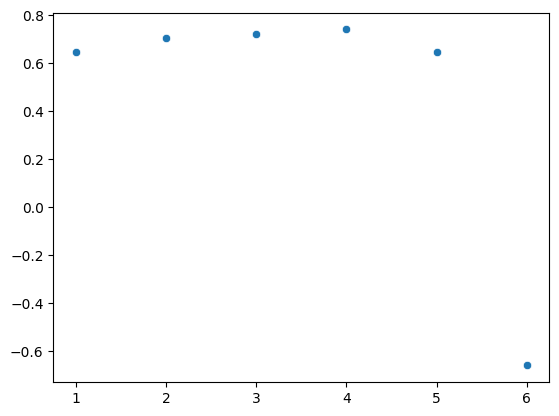

In [85]:
degree = []
score = []
for i in range(1,7):
    degree.append(i)
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    pipeline.fit(X_train_poly,y_train)
    y_pred = pipeline.predict(X_test_poly)
    score.append(r2_score(y_test,y_pred))

sns.scatterplot(x=degree,y=score)

from the graph it is clear that the best score will be at degree 4

In [87]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
pipeline.fit(X_train_poly,y_train)
y_pred = pipeline.predict(X_test_poly)
x_pred = pipeline.predict(X_train_poly)
print('training score',r2_score(y_train,x_pred))
print('test score',r2_score(y_test,y_pred))

training score 0.7620679263904823
test score 0.7404625145956278
